In [17]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [19]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle

#import mapfxn as mf
#reload(mf)

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [53]:
#root directory, where to find Met office files
rdir = '/gpfs/home/mep22dku/scratch/MET_soft/'
dir_1H = 'hist/u-bc370_hist/'
dir_2H = 'hist/u-cj198_hist_1950start1950ozone/'
dir_3H = 'hist/u-cj200_hist_1990start1990ozone/'

dir_1FA = 'ssp126/u-be682_ssp126/'
dir_1FB = 'ssp370/u-ce417_ssp370/'

dir_2FA = 'ssp126/u-cj880_ssp126_1950start1950ozone/'
dir_2FB = 'ssp370/u-cj881_ssp370_1950start1950ozone/'

dir_3FA = 'ssp126/u-cj484_ssp126_1990start1990ozone/'
dir_3FB = 'ssp370/u-cj504_ssp370_1990start1990ozone/'

name_1H = '1H: NatlOzone-historical'
name_2H = '2H: Ozone1950-historical'
name_3H = '3H: Ozone1990-historical'
name_1FA = '1FA: NatlOzone-SSP126'
name_1FB = '1FB: NatlOzone-SSP370'
name_2FA = '2FA: Ozone1950-SSP126'
name_2FB = '2FB: Ozone1950-SSP370'
name_3FA = '3FA: Ozone1990-SSP126'
name_3FB = '3FB: Ozone1990-SSP370'

col_1A = 'darksalmon'; col_1B = 'sienna'
col_2A = 'lightgreen'; col_2B = 'g'
col_3A = 'dodgerblue'; col_3B = 'mediumblue'

exp_1H = 'bc370'; exp_2H = 'cj198'; exp_3H = 'cj200'
exp_1FA = 'be682'; exp_1FB = 'ce417'
exp_2FA = 'cj880'; exp_2FB = 'cj881'
exp_3FA = 'cj484'; exp_3FB = 'cj504'

runhorse = False

In [21]:
arange = np.arange(1940,2101,1)

ind_1A = np.zeros_like(arange)
ind_1B = np.zeros_like(arange)
ind_2A = np.zeros_like(arange)
ind_2B = np.zeros_like(arange)
ind_3A = np.zeros_like(arange)
ind_3B = np.zeros_like(arange)

ind_1A = ind_1A.astype(float)
ind_1B = ind_1B.astype(float)
ind_2A = ind_2A.astype(float)
ind_2B = ind_2B.astype(float)
ind_3A = ind_3A.astype(float)
ind_3B = ind_3B.astype(float)


In [22]:
typ = 22 
yr = 1940


for i in range(0,len(arange)):
    yr = arange[i]
    if yr < 2015: tdir = dir_1H
    if yr >= 2015: tdir = dir_1FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_1A[i] = 1
        
    if yr < 2015: tdir = dir_1H
    if yr >= 2015: tdir = dir_1FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_1B[i] = 1.5
        
    if yr < 2015: tdir = dir_2H
    if yr >= 2015: tdir = dir_2FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_2A[i] = 2
        
    if yr < 2015: tdir = dir_2H
    if yr >= 2015: tdir = dir_2FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_2B[i] = 2.5
        
    if yr < 2015: tdir = dir_3H
    if yr >= 2015: tdir = dir_3FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_3A[i] = 3
        
    if yr < 2015: tdir = dir_3H
    if yr >= 2015: tdir = dir_3FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_3B[i] = 3.5

In [23]:
ind_1A[ind_1A < 1] = np.nan
ind_1B[ind_1B < 1] = np.nan
ind_2A[ind_2A < 1] = np.nan
ind_2B[ind_2B < 1] = np.nan
ind_3A[ind_3A < 1] = np.nan
ind_3B[ind_3B < 1] = np.nan

# ozone evolution to 1990 in 3A, 3B is the same as in 1A, 1B
ind_3A[(arange < 1990) & (ind_1A > 0)] = 3
ind_3B[(arange < 1990) & (ind_1A > 0)] = 3.5
ind_2A[(arange < 1950) & (ind_1A > 0)] = 2
ind_2B[(arange < 1950) & (ind_1A > 0)] = 2.5

Text(0.5, 1.0, 'Availability of wind forcing (bulk_YEAR_22_met_daily.nc) \n for 6 scenarios')

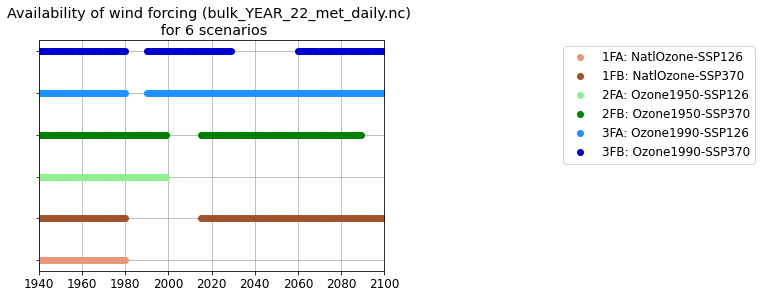

In [24]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
plt.plot(arange,ind_1A,marker = 'o',linestyle = '', color = col_1A, label = name_1FA)
plt.plot(arange,ind_1B,marker = 'o',linestyle = '',  color = col_1B, label = name_1FB)
plt.plot(arange,ind_2A,marker = 'o',linestyle = '', color = col_2A, label = name_2FA)
plt.plot(arange,ind_2B,marker = 'o',linestyle = '',  color = col_2B, label = name_2FB)
plt.plot(arange,ind_3A,marker = 'o',linestyle = '', color = col_3A, label = name_3FA)
plt.plot(arange,ind_3B,marker = 'o',linestyle = '',  color = col_3B, label = name_3FB)
ax.set_yticklabels([])
ax.grid()
ax.set_xlim([1940,2100])
plt.legend(bbox_to_anchor = [1.5,1])
plt.title(f'Availability of wind forcing (bulk_YEAR_22_met_daily.nc) \n for 6 scenarios')

## extract and visualize mean temperatures

In [25]:
def return_mean_SO_temp(tdir,yr):
    var_summer_SO_mean = np.nan; var_winter_SO_mean = np.nan; var_summer_SO_std = np.nan
    var_winter_SO_std = np.nan; var_summer_SO_max = np.nan; var_winter_SO_max = np.nan
    var_summer_SO_min = np.nan; var_winter_SO_min = np.nan
    
    typ = 16; var = 'air'
    rdir = f'/gpfs/home/mep22dku/scratch/MET_soft/{tdir}'
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{fnam}')
    try:
        w2 = nc.Dataset(w[0])
        tvar = (w2[var])
        var_summer_SO = np.concatenate((tvar[334:365,0:50,:],tvar[0:59,0:50,:]), axis = 0)-273.15 
        var_winter_SO = (tvar[151:244,0:50,:])-273.15 
        var_summer_SO_mean = np.nanmean(var_summer_SO)
        var_winter_SO_mean = np.nanmean(var_winter_SO)
        var_summer_SO_std = np.nanstd(var_summer_SO)
        var_winter_SO_std = np.nanstd(var_winter_SO)
        var_summer_SO_max = np.nanmax(var_summer_SO)
        var_winter_SO_max = np.nanmax(var_winter_SO)
        var_summer_SO_min = np.nanmin(var_summer_SO)
        var_winter_SO_min = np.nanmin(var_winter_SO)
    except:
        w = 'x'
        
    return var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, \
        var_winter_SO_std, var_summer_SO_max, var_winter_SO_max, var_summer_SO_min, var_winter_SO_min

def calc_stats(tdir, yrstart, yrend):
    yrs = np.arange(yrstart,yrend,1)
    stor = np.zeros([2,4,len(yrs)])
    for i in range(0,len(yrs)):
        yr = yrs[i]
        if yr%50 == 0: print(yr)
        var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, var_winter_SO_std, var_summer_SO_max,\
        var_winter_SO_max, var_summer_SO_min, var_winter_SO_min = return_mean_SO_temp(tdir,yr)
        stor[0,0,i] = var_summer_SO_mean; stor[0,1,i] = var_summer_SO_std
        stor[0,2,i] = var_summer_SO_max; stor[0,3,i] = var_summer_SO_min
        stor[1,0,i] = var_winter_SO_mean; stor[1,1,i] = var_winter_SO_std
        stor[1,2,i] = var_winter_SO_max; stor[1,3,i] = var_winter_SO_min
    
    return stor


In [26]:
if runhorse:
    tnam = 'scen_1H'; tdir = dir_1H; yrstart = 1940; yrend = 2015
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2H'; tdir = dir_2H; yrstart = 1950; yrend = 2015
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3H'; tdir = dir_3H; yrstart = 1990; yrend = 2015
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FA'; tdir = dir_1FA; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FA'; tdir = dir_2FA; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FA'; tdir = dir_3FA; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FB'; tdir = dir_1FB; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FB'; tdir = dir_2FB; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FB'; tdir = dir_3FB; yrstart = 2015; yrend = 2101
    stor = calc_stats(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_temp_{yrstart}_{yrend}.pkl", 'wb'))

1950
2000
1950
2000
2000
2050
2100
2050
2100
2050
2100
2050
2100
2050
2100
2050
2100


In [37]:
def plot_scen_summer(yrstart, yrend, stor, ax, tcol, tnam, hist = True, lw = 3):
    arange = np.arange(yrstart,yrend,1)
    if hist: 
        ln = '-'
    else:  
        ln = '-'
        lw = 1.5
    ax.plot(arange, stor[0,0,:],linestyle = ln, color = tcol, linewidth = lw, label = tnam)
    # ax.fill_between(arange, stor[0,0,:]+stor[0,1,:],stor[0,0,:]-stor[0,1,:], color = tcol, alpha = 0.3)
    # ax.plot(arange, stor[0,2,:],linestyle = ':', color = tcol, label = tnam)
    # ax.plot(arange, stor[0,3,:],linestyle = ':', color = tcol, label = tnam)
    
def plot_scen_winter(yrstart, yrend, stor, ax, tcol, tnam, hist = True, lw = 3):
    arange = np.arange(yrstart,yrend,1)
    if hist: 
        ln = '-'
    else:  
        ln = '-'
        lw = 1.5
    ax.plot(arange, stor[1,0,:],linestyle = ln, color = tcol, linewidth = lw, label = tnam)
    # ax.fill_between(arange, stor[1,0,:]+stor[1,1,:],stor[1,0,:]-stor[1,1,:], color = tcol, alpha = 0.3)
    # ax.plot(arange, stor[1,2,:],linestyle = ':', color = tcol, label = tnam)
    # ax.plot(arange, stor[1,3,:],linestyle = ':', color = tcol, label = tnam)

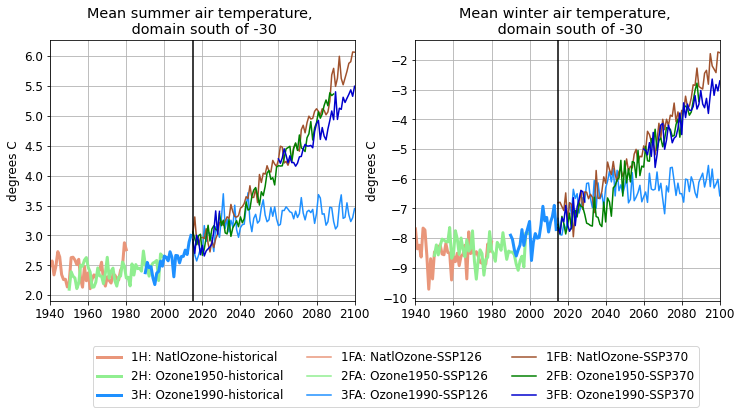

In [38]:
 fact = 0.6
fig, axs = plt.subplots(1,2, figsize=(20*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scen = 'scen_1H'; yrstart = 1940; yrend = 2015
scen_1H_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1H_stor, axs[0], col_1A, name_1H)
plot_scen_winter(yrstart, yrend, scen_1H_stor, axs[1], col_1A, name_1H)
scen = 'scen_2H'; yrstart = 1950; yrend = 2015
scen_2H_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2H_stor, axs[0], col_2A, name_2H)
plot_scen_winter(yrstart, yrend, scen_2H_stor, axs[1], col_2A, name_2H)
scen = 'scen_3H'; yrstart = 1990; yrend = 2015
scen_3H_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3H_stor, axs[0], col_3A, name_3H)
plot_scen_winter(yrstart, yrend, scen_3H_stor, axs[1], col_3A, name_3H)
##
scen = 'scen_1FA'; yrstart = 2015; yrend = 2101
scen_1FA_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1FA_stor, axs[0], col_1A, name_1FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_1FA_stor, axs[1], col_1A, name_1FA, hist = False)
scen = 'scen_2FA'; yrstart = 2015; yrend = 2101
scen_2FA_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2FA_stor, axs[0], col_2A, name_2FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_2FA_stor, axs[1], col_2A, name_2FA, hist = False)
scen = 'scen_3FA'; yrstart = 2015; yrend = 2101
scen_3FA_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3FA_stor, axs[0], col_3A, name_3FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_3FA_stor, axs[1], col_3A, name_3FA, hist = False)

scen = 'scen_1FB'; yrstart = 2015; yrend = 2101
scen_1FB_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1FB_stor, axs[0], col_1B, name_1FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_1FB_stor, axs[1], col_1B, name_1FB, hist = False)
scen = 'scen_2FB'; yrstart = 2015; yrend = 2101
scen_2FB_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2FB_stor, axs[0], col_2B, name_2FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_2FB_stor, axs[1], col_2B, name_2FB, hist = False)
scen = 'scen_3FB'; yrstart = 2015; yrend = 2101
scen_3FB_stor = pickle.load(open(f'./pkls/{scen}_temp_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3FB_stor, axs[0], col_3B, name_3FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_3FB_stor, axs[1], col_3B, name_3FB, hist = False)

for i in range(0,2):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[1].legend(bbox_to_anchor = [0.95, -0.15], ncol = 3)
    axs[0].set_title('Mean summer air temperature, \n domain south of -30')
    axs[1].set_title('Mean winter air temperature, \n domain south of -30')
    axs[i].axvline(x=2015, color = 'k')
    axs[i].set_ylabel('degrees C')

# U FLX 

In [29]:
def return_mean_SO_uflx(tdir,yr):
    var_summer_SO_mean = np.nan; var_winter_SO_mean = np.nan; var_summer_SO_std = np.nan
    var_winter_SO_std = np.nan; var_summer_SO_max = np.nan; var_winter_SO_max = np.nan
    var_summer_SO_min = np.nan; var_winter_SO_min = np.nan
    
    typ = 16; var = 'uflx'
    rdir = f'/gpfs/home/mep22dku/scratch/MET_soft/{tdir}'
    fnam = f'taux_1d_{yr}_daily.nc'
    w = glob.glob(f'{rdir}{fnam}')
    try:
        w2 = nc.Dataset(w[0])
        tvar = (w2[var])
        var_summer_SO = np.concatenate((tvar[334:365,0:50,:],tvar[0:59,0:50,:]), axis = 0)
        var_winter_SO = (tvar[151:244,0:50,:]) 
        var_summer_SO_mean = np.nanmean(var_summer_SO)
        var_winter_SO_mean = np.nanmean(var_winter_SO)
        var_summer_SO_std = np.nanstd(var_summer_SO)
        var_winter_SO_std = np.nanstd(var_winter_SO)
        var_summer_SO_max = np.nanmax(var_summer_SO)
        var_winter_SO_max = np.nanmax(var_winter_SO)
        var_summer_SO_min = np.nanmin(var_summer_SO)
        var_winter_SO_min = np.nanmin(var_winter_SO)
    except:
        w = 'x'
        
    return var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, \
        var_winter_SO_std, var_summer_SO_max, var_winter_SO_max, var_summer_SO_min, var_winter_SO_min
    
def calc_stats_uflx(tdir, yrstart, yrend):
    yrs = np.arange(yrstart,yrend,1)
    stor = np.zeros([2,4,len(yrs)])
    for i in range(0,len(yrs)):
        yr = yrs[i]
        if yr%50 == 0: print(yr)
        var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, var_winter_SO_std, var_summer_SO_max,\
        var_winter_SO_max, var_summer_SO_min, var_winter_SO_min = return_mean_SO_uflx(tdir,yr)
        stor[0,0,i] = var_summer_SO_mean; stor[0,1,i] = var_summer_SO_std
        stor[0,2,i] = var_summer_SO_max; stor[0,3,i] = var_summer_SO_min
        stor[1,0,i] = var_winter_SO_mean; stor[1,1,i] = var_winter_SO_std
        stor[1,2,i] = var_winter_SO_max; stor[1,3,i] = var_winter_SO_min

    return stor


In [30]:

if runhorse:
    tnam = 'scen_1H'; tdir = dir_1H; yrstart = 1940; yrend = 2015
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2H'; tdir = dir_2H; yrstart = 1950; yrend = 2015
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3H'; tdir = dir_3H; yrstart = 1990; yrend = 2015
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FA'; tdir = dir_1FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FA'; tdir = dir_2FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FA'; tdir = dir_3FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FB'; tdir = dir_1FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FB'; tdir = dir_2FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FB'; tdir = dir_3FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_uflx(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_uflx_{yrstart}_{yrend}.pkl", 'wb'))

1950
2000
1950
2000
2000
2050
2100
2050
2100
2050
2100
2050
2100
2050
2100
2050
2100


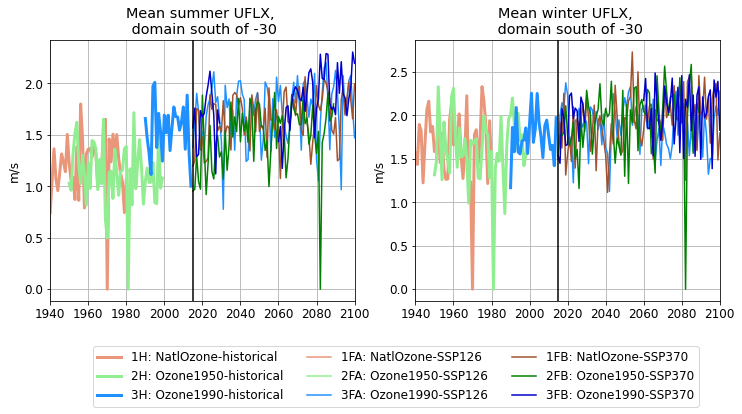

In [40]:
 fact = 0.6
fig, axs = plt.subplots(1,2, figsize=(20*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scen = 'scen_1H'; yrstart = 1940; yrend = 2015
scen_1H_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1H_stor, axs[0], col_1A, name_1H)
plot_scen_winter(yrstart, yrend, scen_1H_stor, axs[1], col_1A, name_1H)
scen = 'scen_2H'; yrstart = 1950; yrend = 2015
scen_2H_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2H_stor, axs[0], col_2A, name_2H)
plot_scen_winter(yrstart, yrend, scen_2H_stor, axs[1], col_2A, name_2H)
scen = 'scen_3H'; yrstart = 1990; yrend = 2015
scen_3H_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3H_stor, axs[0], col_3A, name_3H)
plot_scen_winter(yrstart, yrend, scen_3H_stor, axs[1], col_3A, name_3H)
##
scen = 'scen_1FA'; yrstart = 2015; yrend = 2101
scen_1FA_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1FA_stor, axs[0], col_1A, name_1FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_1FA_stor, axs[1], col_1A, name_1FA, hist = False)
scen = 'scen_2FA'; yrstart = 2015; yrend = 2101
scen_2FA_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2FA_stor, axs[0], col_2A, name_2FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_2FA_stor, axs[1], col_2A, name_2FA, hist = False)
scen = 'scen_3FA'; yrstart = 2015; yrend = 2101
scen_3FA_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3FA_stor, axs[0], col_3A, name_3FA, hist = False)
plot_scen_winter(yrstart, yrend, scen_3FA_stor, axs[1], col_3A, name_3FA, hist = False)

scen = 'scen_1FB'; yrstart = 2015; yrend = 2101
scen_1FB_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_1FB_stor, axs[0], col_1B, name_1FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_1FB_stor, axs[1], col_1B, name_1FB, hist = False)
scen = 'scen_2FB'; yrstart = 2015; yrend = 2101
scen_2FB_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_2FB_stor, axs[0], col_2B, name_2FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_2FB_stor, axs[1], col_2B, name_2FB, hist = False)
scen = 'scen_3FB'; yrstart = 2015; yrend = 2101
scen_3FB_stor = pickle.load(open(f'./pkls/{scen}_uflx_{yrstart}_{yrend}.pkl','rb'))
plot_scen_summer(yrstart, yrend, scen_3FB_stor, axs[0], col_3B, name_3FB, hist = False)
plot_scen_winter(yrstart, yrend, scen_3FB_stor, axs[1], col_3B, name_3FB, hist = False)

for i in range(0,2):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[1].legend(bbox_to_anchor = [0.95, -0.15], ncol = 3)
    axs[0].set_title('Mean summer UFLX, \n domain south of -30')
    axs[1].set_title('Mean winter UFLX, \n domain south of -30')
    axs[i].axvline(x=2015, color = 'k')
    axs[i].set_ylabel('m/s')

In [32]:
print('done')

done


# wind speed

In [50]:
def return_mean_SO_wspd(tdir,yr):
    var_summer_SO_mean = np.nan; var_winter_SO_mean = np.nan; var_summer_SO_std = np.nan
    var_winter_SO_std = np.nan; var_summer_SO_max = np.nan; var_winter_SO_max = np.nan
    var_summer_SO_min = np.nan; var_winter_SO_min = np.nan
    

    rdir = f'/gpfs/home/mep22dku/scratch/MET_soft/{tdir}'
    uf_f = glob.glob(f'{rdir}/taux_1d_{yr}_daily.nc')
    vf_f = glob.glob(f'{rdir}/tauy_1d_{yr}_daily.nc')

    try:
        uf = nc.Dataset(uf_f[0])
        tvar = (uf['uflx'])
        vf = nc.Dataset(vf_f[0])
        tvar2 = (vf['vflx'])
        var_summer_SO = np.sqrt(np.concatenate((tvar[334:365,0:50,:],tvar[0:59,0:50,:]), axis = 0)**2+\
                             np.concatenate((tvar2[334:365,0:50,:],tvar2[0:59,0:50,:]), axis = 0)**2)
                                
        var_winter_SO = np.sqrt(tvar[151:244,0:50,:]**2+tvar2[151:244,0:50,:]**2)
        
        var_summer_SO_mean = np.nanmean(var_summer_SO)
        var_winter_SO_mean = np.nanmean(var_winter_SO)
        var_summer_SO_std = np.nanstd(var_summer_SO)
        var_winter_SO_std = np.nanstd(var_winter_SO)
        var_summer_SO_max = np.nanmax(var_summer_SO)
        var_winter_SO_max = np.nanmax(var_winter_SO)
        var_summer_SO_min = np.nanmin(var_summer_SO)
        var_winter_SO_min = np.nanmin(var_winter_SO)
    except:
        w = 'x'
        
    return var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, \
        var_winter_SO_std, var_summer_SO_max, var_winter_SO_max, var_summer_SO_min, var_winter_SO_min
    
def calc_stats_wspd(tdir, yrstart, yrend):
    yrs = np.arange(yrstart,yrend,1)
    stor = np.zeros([2,4,len(yrs)])
    for i in range(0,len(yrs)):
        yr = yrs[i]
        if yr%50 == 0: print(yr)
        var_summer_SO_mean, var_winter_SO_mean, var_summer_SO_std, var_winter_SO_std, var_summer_SO_max,\
        var_winter_SO_max, var_summer_SO_min, var_winter_SO_min = return_mean_SO_wspd(tdir,yr)
        stor[0,0,i] = var_summer_SO_mean; stor[0,1,i] = var_summer_SO_std
        stor[0,2,i] = var_summer_SO_max; stor[0,3,i] = var_summer_SO_min
        stor[1,0,i] = var_winter_SO_mean; stor[1,1,i] = var_winter_SO_std
        stor[1,2,i] = var_winter_SO_max; stor[1,3,i] = var_winter_SO_min

    return stor

In [52]:

if runhorse:
    tnam = 'scen_1H'; tdir = dir_1H; yrstart = 1940; yrend = 2015
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2H'; tdir = dir_2H; yrstart = 1950; yrend = 2015
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3H'; tdir = dir_3H; yrstart = 1990; yrend = 2015
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FA'; tdir = dir_1FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FA'; tdir = dir_2FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FA'; tdir = dir_3FA; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_1FB'; tdir = dir_1FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_2FB'; tdir = dir_2FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

    tnam = 'scen_3FB'; tdir = dir_3FB; yrstart = 2015; yrend = 2101
    stor = calc_stats_wspd(tdir,yrstart,yrend)
    pickle.dump(stor, open(f"./pkls/{tnam}_wspd_{yrstart}_{yrend}.pkl", 'wb'))

/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
1950
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u-bc370_hist/
/gpfs/home/mep22dku/scratch/MET_soft/hist/u